In [1]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = [8, 8]

import warnings
warnings.filterwarnings("ignore")

np.random.seed(10)

sns.set_style('darkgrid')

## Часть 1. EDA

#### ✅ 1. Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [2]:
# Load the data, don't forget to set the 1st column ('id') as column - so 'index_col=[0]'
# 'index_col=[0]' is the unsupport!
data = pd.read_csv('data.csv', index_col=[0])
data.index.name = 'patient_id' 
data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
patient_id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN


In [3]:
sorted(data.columns.tolist())

['Unnamed: 32',
 'area_mean',
 'area_se',
 'area_worst',
 'compactness_mean',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'diagnosis',
 'fractal_dimension_mean',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'smoothness_mean',
 'smoothness_se',
 'smoothness_worst',
 'symmetry_mean',
 'symmetry_se',
 'symmetry_worst',
 'texture_mean',
 'texture_se',
 'texture_worst']

### Data stats: shape

In [4]:
data.shape

(569, 32)

### Data columns types:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

❗Dataset is totally cleared - no any NULL-values etc. Just drop the useless column - 'Unnamed: 32'

In [6]:
# Column (Unnamed:32) with 569 missing values, we drop it
data.dropna(axis=1, inplace=True)

#### ✅ 2. Посмотрите на базовые статистики датасета: средние, медианы, и т.д.

# Корреляционный анализ 


In [7]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We lost the 'diagnosis' as 'M' if tumour is Malign and 'B' if Benign

In [8]:
# We change these "object" values for 1 if Malign and 0 if Benign
data['diagnosis'].replace(['M','B'],[1,0],inplace=True)

In [9]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### ✅ 3. Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.

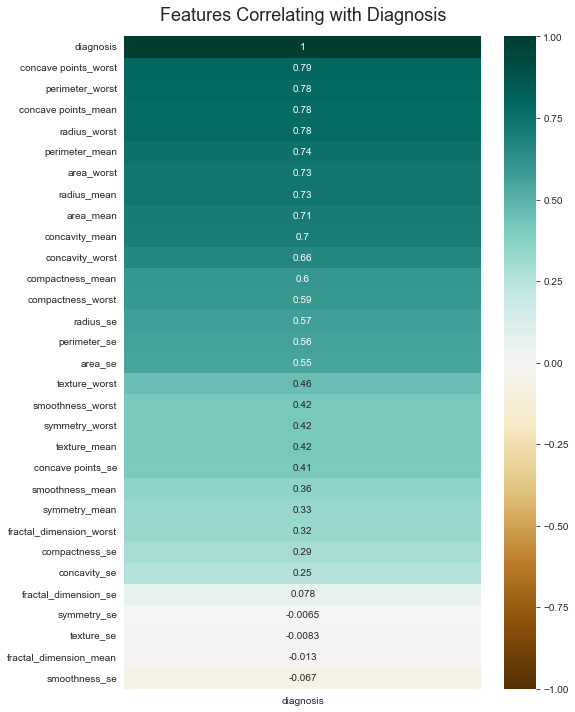

In [10]:
# Hybrid Heatmap + Plot correlations with diagnosis column to check poss options
corr = data.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Diagnosis', fontdict={'fontsize':18}, pad=16);

In [11]:
# Let's to find the top 10 columns by the correlation ratio

k = 10
corrmat = data.corr()
cols = corrmat.nlargest(k, 'diagnosis')['diagnosis'].index.tolist()
cols

['diagnosis',
 'concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean']

In [12]:
# Let's check the 'default' ratio to see the difference with the model results

data['diagnosis'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

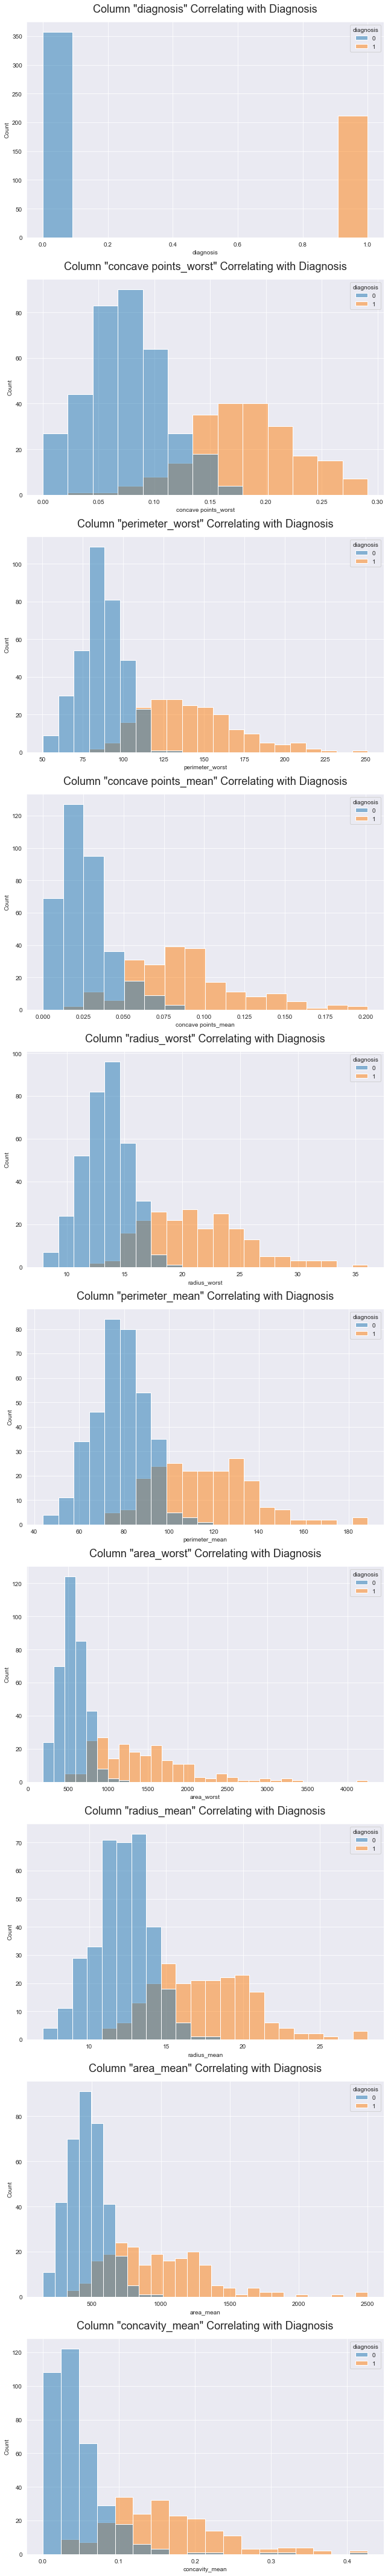

In [13]:
# Create the hists with those columns and split them by the diagnosis

fig, axs = plt.subplots(10, figsize=(10,60))
fig.tight_layout(pad=5.0)

for i, col in enumerate(data[cols]):
    hist = sns.histplot(data=data, x=col, ax=axs[i], hue='diagnosis', label='diagnosis')
    hist.set_title(f'Column "{col}" Correlating with Diagnosis', fontdict={'fontsize':18}, pad=16);
    
plt.show();

✅Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?

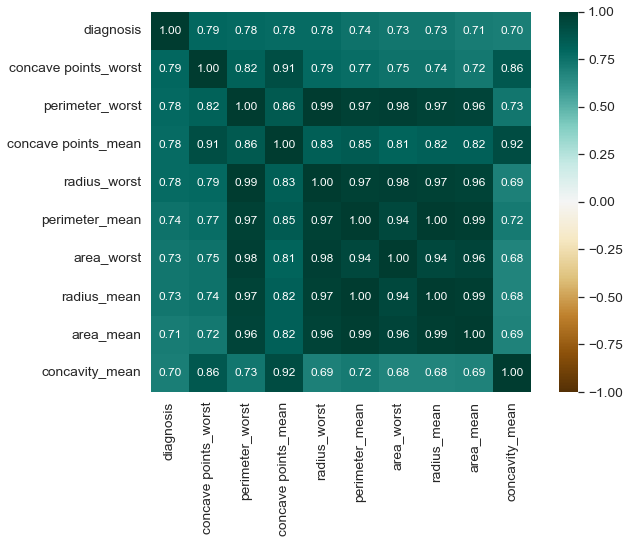

In [14]:
# Method 1 to Detect MultiCollinearity
cm = np.corrcoef(data[cols].values.T)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=cols, xticklabels=cols, vmin=-1, center=0,\
                    cmap=sns.color_palette('BrBG',1000))
plt.show()

In [15]:
# Method 2 to Detect MultiCollinearity

def get_VIF(dataFrame , target):
    X = add_constant(dataFrame.loc[:, dataFrame.columns != target])
    seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,)
    return seriesObject

target = 'diagnosis'

print(get_VIF(data,target))

# (Any value greater than ~10(!) shows MultiCollinearity)

# Therefore we can drop them or we can use Ridge/Lasso regression to descrease the MultiCollinearity

const                      1868.188844
radius_mean                3806.115296
texture_mean                 11.884048
perimeter_mean             3786.400419
area_mean                   347.878657
smoothness_mean               8.194282
compactness_mean             50.505168
concavity_mean               70.767720
concave points_mean          60.041733
symmetry_mean                 4.220656
fractal_dimension_mean       15.756977
radius_se                    75.462027
texture_se                    4.205423
perimeter_se                 70.359695
area_se                      41.163091
smoothness_se                 4.027923
compactness_se               15.366324
concavity_se                 15.694833
concave points_se            11.520796
symmetry_se                   5.175426
fractal_dimension_se          9.717987
radius_worst                799.105946
texture_worst                18.569966
perimeter_worst             405.023336
area_worst                  337.221924
smoothness_worst         

✅Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?

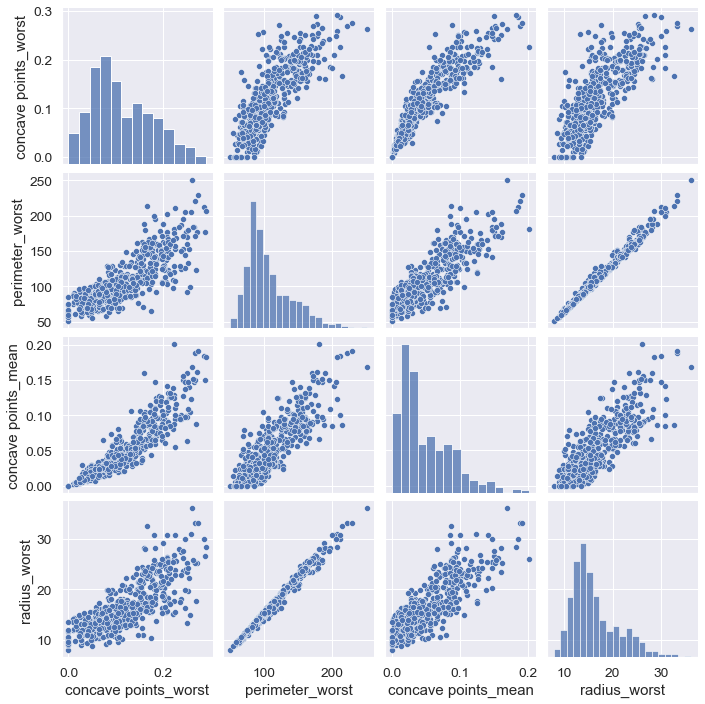

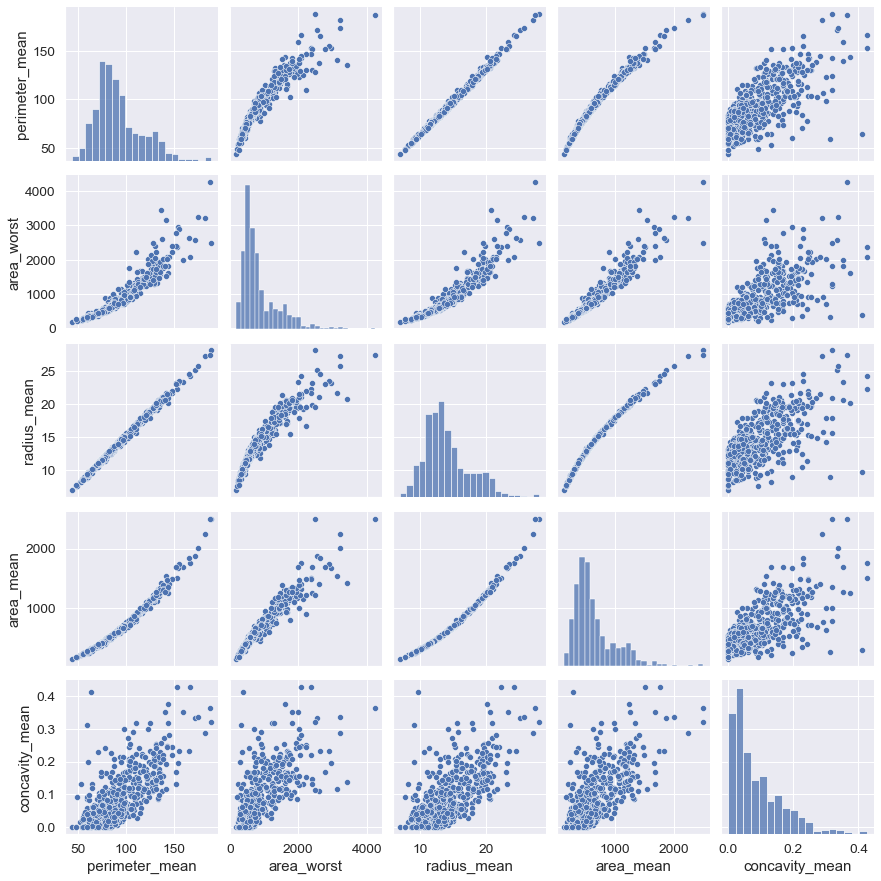

In [16]:
print(sns.pairplot(data=data[cols[1:5]]))
print(sns.pairplot(data=data[cols[5:]]))

We can that the some pairs have linear relations -
    it forms a straight line or near to it
###### But not all of them!

✅Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных

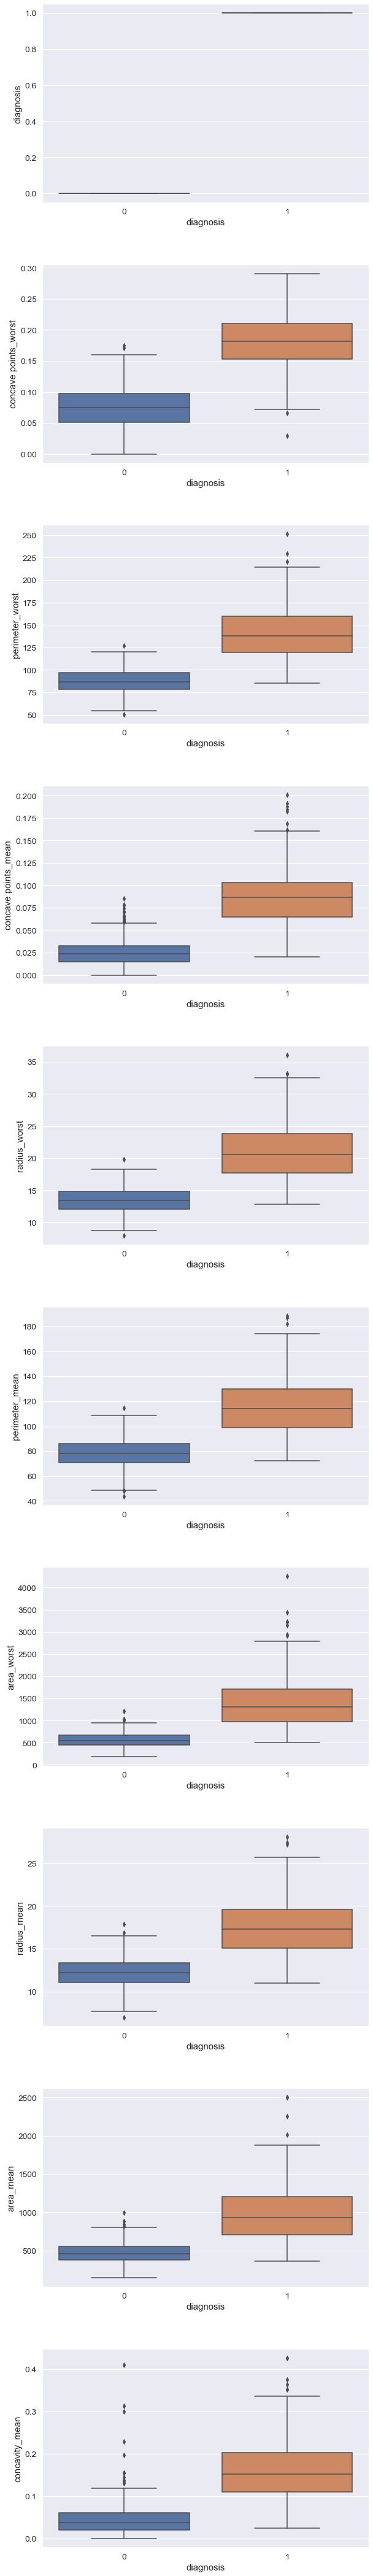

In [17]:
# Check the correlation and possible values by the boxplots:

fig, axs = plt.subplots(10, figsize=(10,60))
fig.tight_layout(pad=5.0)

for i, col in enumerate(data[cols]):
    sns.boxplot(y=col, x='diagnosis', data=data, ax=axs[i])
    
plt.show();

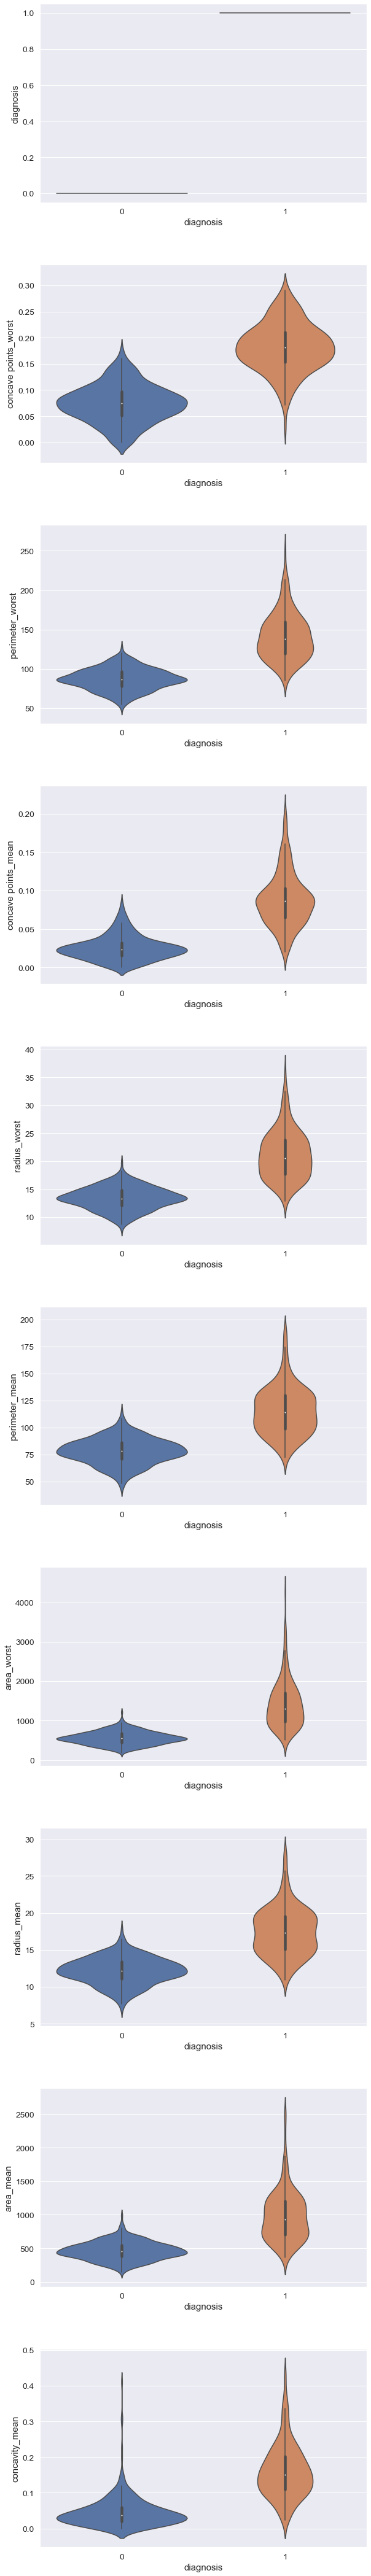

In [18]:
# Check the correlation and possible values by the violinplots:

fig, axs = plt.subplots(10, figsize=(10,60))
fig.tight_layout(pad=5.0)

for i, col in enumerate(data[cols]):
    sns.violinplot(y=col, x='diagnosis', data=data, ax=axs[i])
    
plt.show();

## Часть 2. Моделирование при помощи kNN

✅Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.

In [19]:
# Minor func to check the main metrics:

def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

✅Разбейте данные на train-test, отложив 30% выборки для тестирования.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), data['diagnosis'], test_size=0.30, random_state=42, stratify=data['diagnosis']
)

##### Check the stratify-effect to split and save the % of 'diagnosis'

In [21]:
y_train.value_counts(normalize=True)

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [22]:
y_test.value_counts(normalize=True)

0    0.625731
1    0.374269
Name: diagnosis, dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
quality(y_pred, y_test)

Accuracy:  0.942
Precision: 0.906
Recall:    0.935
F1-score:  0.921


In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
print('ROC-AUC ', round(roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]),3))

ROC-AUC  0.934


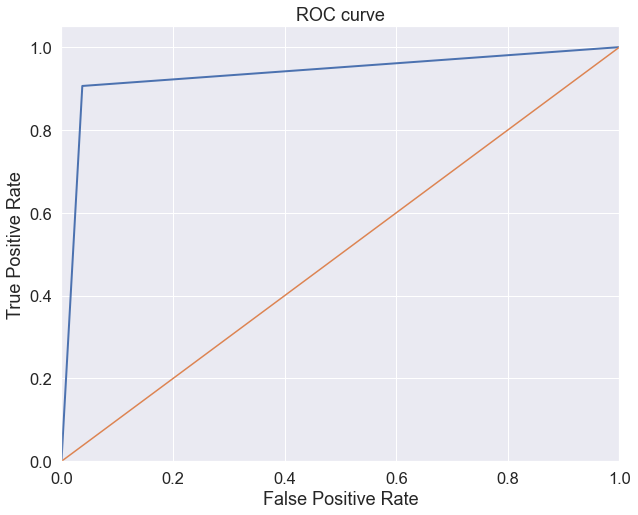

In [27]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [28]:
from sklearn.model_selection import cross_val_score

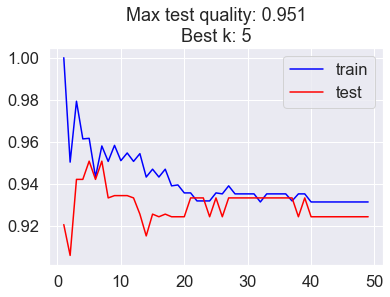

In [29]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
quality(y_pred, y_test)

Accuracy:  0.965
Precision: 0.906
Recall:    1.000
F1-score:  0.951


In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
print('ROC-AUC ', round(roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]),3))

ROC-AUC  0.988


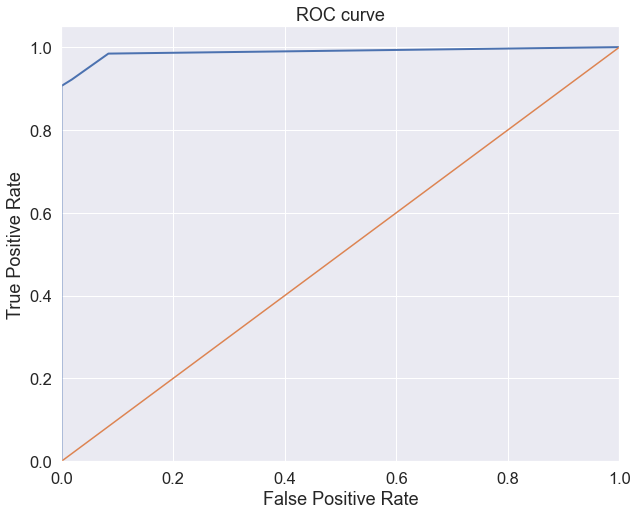

In [32]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Бонусное задание для любопытствующих, к которому можно вернуться после изучения логистической регрессии:\
Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция Пирсона между которыми превышает 0.85.

In [33]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [34]:
# df = data.drop(['diagnosis'], axis=1)
cor_matrix = data.corr().abs()
triangle_corr_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
print(triangle_corr_matrix)

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                      NaN     0.730029      0.415185        0.742636   
radius_mean                    NaN          NaN      0.323782        0.997855   
texture_mean                   NaN          NaN           NaN        0.329533   
perimeter_mean                 NaN          NaN           NaN             NaN   
area_mean                      NaN          NaN           NaN             NaN   
smoothness_mean                NaN          NaN           NaN             NaN   
compactness_mean               NaN          NaN           NaN             NaN   
concavity_mean                 NaN          NaN           NaN             NaN   
concave points_mean            NaN          NaN           NaN             NaN   
symmetry_mean                  NaN          NaN           NaN             NaN   
fractal_dimension_mean         NaN          NaN           NaN             NaN   
radius_se                   

In [35]:
to_drop_list = [col for col in triangle_corr_matrix.columns if any(triangle_corr_matrix[col] > 0.85)]
print(to_drop_list)
print(len(to_drop_list))

['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
13


In [36]:
data.drop(to_drop_list, axis=1, inplace=True)

# -------------------------

✅Разбейте данные на train-test, отложив 30% выборки для тестирования.\
   Second iteration, by new DF without a columns were dropped before

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), data['diagnosis'], test_size=0.30, random_state=42, stratify=data['diagnosis']
)

##### Check the stratify-effect to split and save the % of 'diagnosis'

In [38]:
y_train.value_counts(normalize=True)

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [39]:
y_test.value_counts(normalize=True)

0    0.625731
1    0.374269
Name: diagnosis, dtype: float64

✅Постройте модель kNN "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty = 'none')

log_reg.fit(X_train, y_train)
print("Train quality:")
quality(log_reg.predict(X_train), y_train)
print("\nTest quality:")
quality(log_reg.predict(X_test), y_test)

Train quality:
Accuracy:  0.967
Precision: 0.939
Recall:    0.972
F1-score:  0.955

Test quality:
Accuracy:  0.947
Precision: 0.906
Recall:    0.951
F1-score:  0.928


In [41]:
from sklearn.metrics import roc_auc_score
print('ROC-AUC ', round(roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]),3))

ROC-AUC  0.992


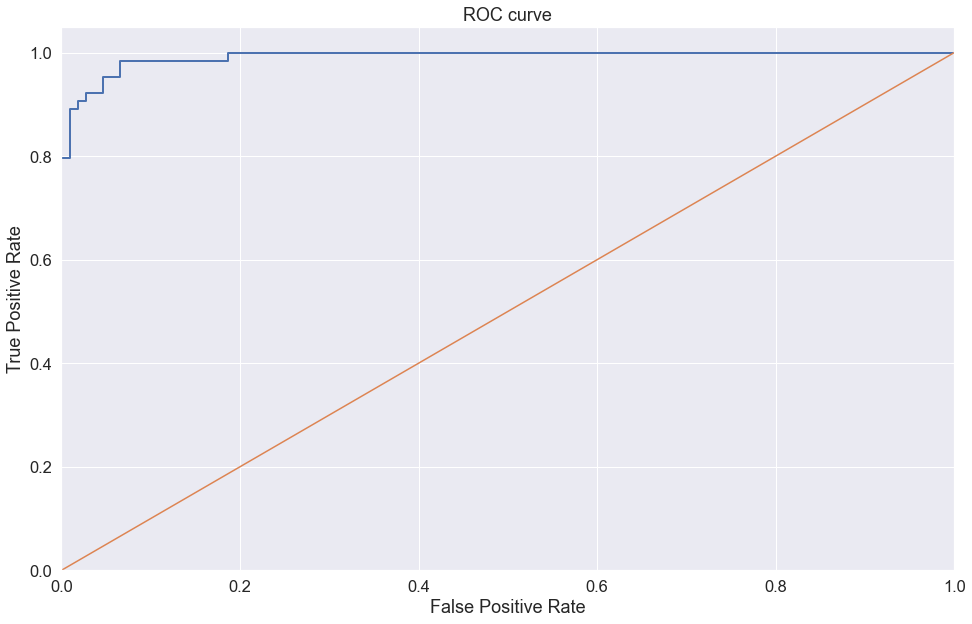

In [42]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(16, 10))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [43]:
print(data.shape)

print(log_reg.coef_.shape)

(569, 18)
(1, 17)


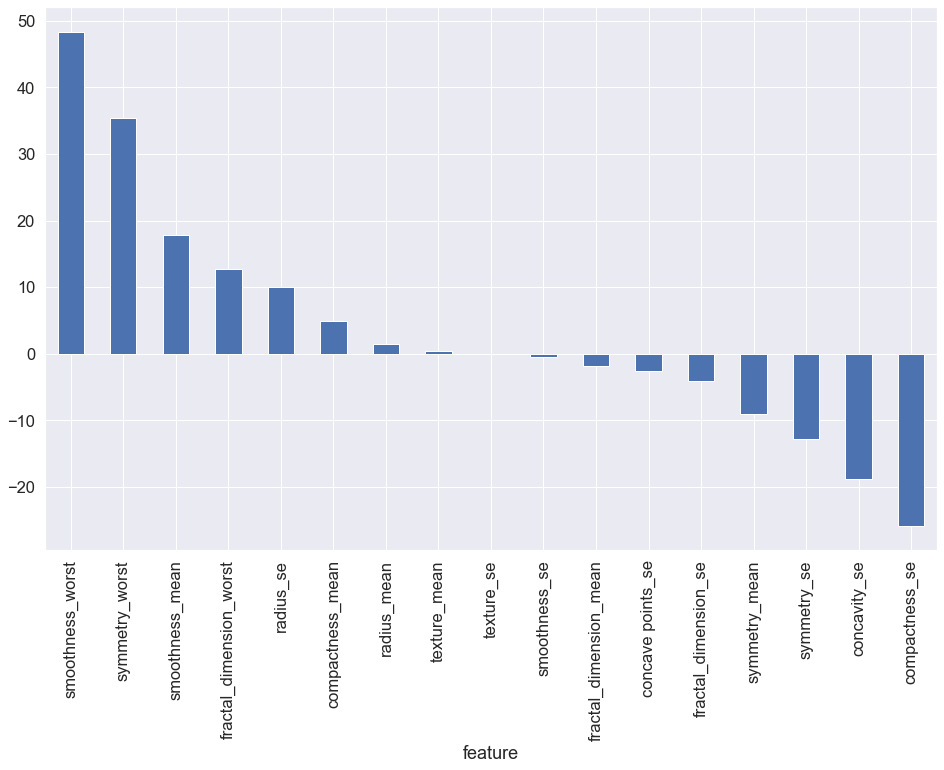

In [44]:
plt.rcParams["figure.figsize"] = [16, 10]
featureImportance = pd.DataFrame({"feature": data.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar();

✅ Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную. Сделайте интересные выводы :)

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

log_reg = LogisticRegression(penalty = 'l2')
clf = GridSearchCV(log_reg, parameters, scoring = 'roc_auc', cv = 5)
clf.fit(data.drop(['diagnosis'], axis=1), data['diagnosis'])

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000]},
             scoring='roc_auc')

In [46]:
pd.DataFrame(clf.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.951145
1,0.01,0.956050
2,0.1,0.958302
3,1,0.969822
4,10,0.984639
5,100,0.990896
6,1000,0.990964
7,10000,0.990490
8,100000,0.990552


In [47]:
print('Best C:', clf.best_params_, '\t Best score: ',clf.best_score_)

Best C: {'C': 1000} 	 Best score:  0.9909638494186479


<AxesSubplot:>

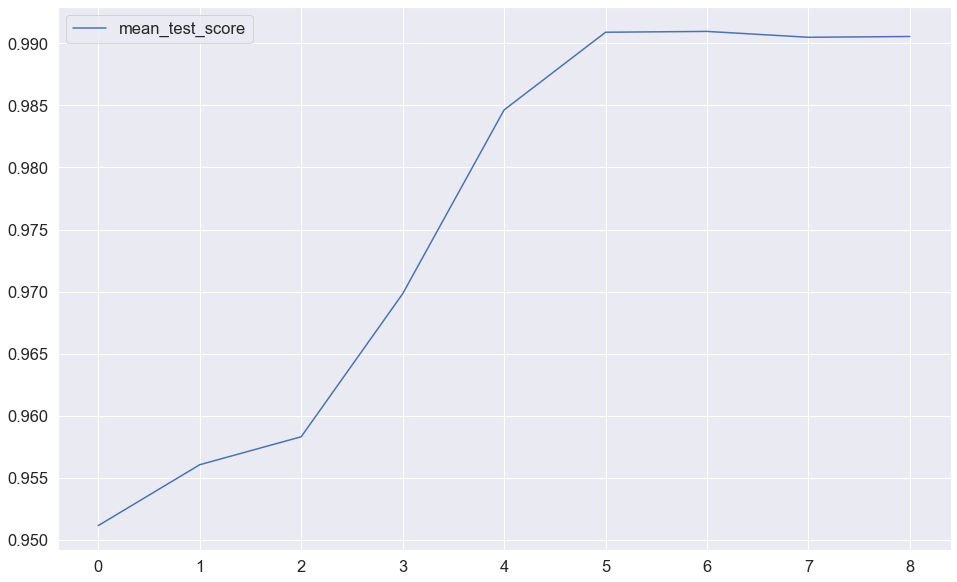

In [48]:
pd.DataFrame(clf.cv_results_)[['mean_test_score']].plot.line();

In [49]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

log_reg = LogisticRegression(solver = 'liblinear', penalty = 'l1')
clf = GridSearchCV(log_reg, parameters, scoring = 'roc_auc', cv = 5)
clf.fit(data.drop(['diagnosis'], axis=1), data['diagnosis'])

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000]},
             scoring='roc_auc')

In [50]:
pd.DataFrame(clf.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.500000
1,0.01,0.594797
2,0.1,0.943599
3,1,0.979835
4,10,0.991947
5,100,0.987629
6,1000,0.982081
7,10000,0.981419
8,100000,0.981221


In [51]:
print('Best C:', clf.best_params_, '\t Best score: ',clf.best_score_)

Best C: {'C': 10} 	 Best score:  0.9919473992967278


<AxesSubplot:>

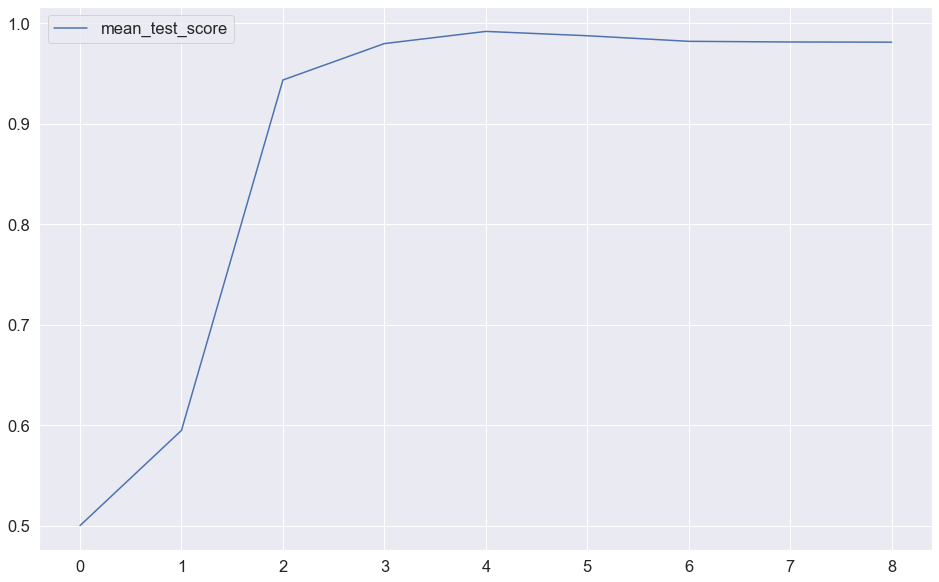

In [52]:
pd.DataFrame(clf.cv_results_)[['mean_test_score']].plot();

# Warning!
## The main difference is the speed to increase the acc-level (100x from Lasso to Ridge) then we don't see any significant diff. 

✅Постройте модель kNN c настройкaми(!) параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней

In [55]:


clf.fit(X_train, y_train)
print("Train quality:")
quality(clf.predict(X_train), y_train)
print("\nTest quality:")
quality(clf.predict(X_test), y_test)

Train quality:
Accuracy:  0.975
Precision: 0.953
Recall:    0.979
F1-score:  0.966

Test quality:
Accuracy:  0.959
Precision: 0.906
Recall:    0.983
F1-score:  0.943


In [56]:
from sklearn.metrics import roc_auc_score
print('ROC-AUC ', round(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]),3))

ROC-AUC  0.995


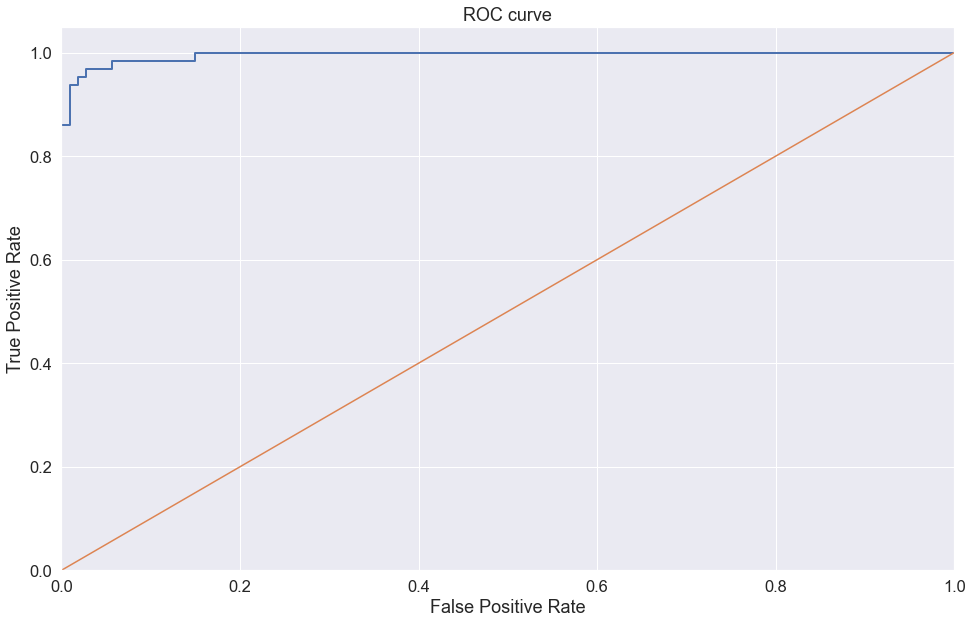

In [57]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(16, 10))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

✅Какая из двух настроенных моделей, kNN или логистическая регрессия оказалась, в итоге, лучше?

#### LogReg: ROC-AUC = 0.995
#### KNN:      ROC-AUC = 0.988

## LogReg is slightly better than the KNN-method